# Capstone 3: Sustainable Energy Recommendation System  
### "Leveraging Neural Collaborative Filtering for Sustainable Energy Insights"
## Exploratory Data Analysis Objectives: 
### 1. Understand Data Distribution  
- Examine statistical summaries of key features.  
- Identify skewness and distribution patterns in numerical data.  
- Visualize density plots and histograms for energy-related variables.  

### 2. Identify Relationships and Trends  
- Analyze correlations between **electricity access, CO₂ emissions, and GDP per capita**.  
- Explore temporal trends for **energy consumption, renewable adoption, and financial flows**.  
- Investigate dependencies between **energy sources (fossil, nuclear, renewables)**.   

### 3. Geospatial Analysis  
- Map energy usage across different regions using **latitude and longitude**.  
- Cluster countries based on **energy accessibility and consumption patterns**.  
- Identify geographical dependencies influencing renewable adoption rates.  

### 4. Outlier Detection & Anomaly Investigation  
- Detect extreme values in **CO₂ emissions, financial flows, and primary energy consumption**.  
- Investigate whether anomalies are reporting errors or meaningful insights.  
- Decide on handling strategies (removal, transformation, separate modeling).  

## Data Overview:
### Feature Name Mapping & Description 

| **Name and Units**             | **Variable Name**                        |  
|-----------------------------------------|-------------------------------------|  
| Entity                                  | `Entity`                           |  
| Year                                    | `Year`                             |  
| Access to electricity (%)               | `Electricity_Access`                  |  
| Clean fuels for cooking (%)             | `Clean_Cooking_Fuels`                 |  
| Renewable capacity per capita           | `Renewable_Capacity`                  |  
| Financial flows (USD)                   | `Financial_Flows`                     |  
| Renewable energy share (%)              | `Renewable_Share`                     |  
| Fossil electricity (TWh)                | `Fossil_Electricity`                  |  
| Nuclear electricity (TWh)               | `Nuclear_Electricity`                 |  
| Renewable electricity (TWh)             | `Renewable_Electricity`               |  
| Low-carbon electricity (%)              | `Low_Carbon_Electricity`              |  
| Energy consumption per capita (kWh)     | `Energy_Consumption`                  |  
| Energy intensity (MJ/USD GDP)             | `Energy_Intensity`                    |  
| CO₂ emissions (metric tons per capita)  | `CO2_Emissions`                       |  
| Renewables (% equivalent primary energy) | `Renewables_Percentage`              |  
| GDP growth (%)                          | `GDP_Growth`                          |  
| GDP per capita (US $)                   | `GDP_Per_Capita`                      |  
| Population density (P/Km²)              | `Population_Density`                  |  
| Land area (Km²)                         | `Land_Area`                           |  
| Latitude                                | `Latitude`                            |  
| Longitude                               | `Longitude`                           |  


##  Features Created in Data Wrangling
| **Name**                         | **Variable Name**                      | **Description** |
|--------------------------------------|-----------------------------------|------------------------------------------------------------|
| Renewables to Fossil Ratio           | `Renewables_to_Fossil`              | Ratio of renewable electricity to fossil electricity.      |
| Energy Efficiency                    | `Energy_Efficiency`                 | Efficiency of energy usage relative to energy production and consumption.  |
| Renewable Nuclear Interaction        | `Renewable_Nuclear_Interaction`     | Relationship between renewable energy and nuclear energy.  |
| Energy Clusters                      | `Energy_Cluster`                    | Clustered energy consumption patterns across countries.    |
| Energy Dependency                    | `Energy_Dependency`                 | Dependency of each country on external energy sources.     |
| CO2 Intensity per Capita             | `CO2_Intensity_Per_Capita`          | CO₂ emissions intensity per capita across different nations. |
| Investment Energy Ratio              | `Investment_Energy_Ratio`           | Investment levels compared to total energy consumption.    |


---


In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import plotly.express as px

In [43]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data/energy_data_cleaned.csv'
df = pd.read_csv(file_path)

In [45]:
df.head()

Entity  Year  Electricity_Access  Clean_Cooking_Fuels  \
0  Afghanistan  2000            1.613591                  6.2   
1  Afghanistan  2001            4.074574                  7.2   
2  Afghanistan  2002            9.409158                  8.2   
3  Afghanistan  2003           14.738506                  9.5   
4  Afghanistan  2004           20.064968                 10.9   

   Renewable_Capacity  Financial_Flows  Renewable_Share  Fossil_Electricity  \
0                9.22          20000.0            44.99                0.16   
1                8.86         130000.0            45.60                0.09   
2                8.47        3950000.0            37.83                0.13   
3                8.09       25970000.0            36.66                0.31   
4                7.75              0.0            44.24                0.33   

   Nuclear_Electricity  Renewable_Electricity  ...  Population_Density  \
0                  0.0                   0.31  ...                60.0   
1                  0.0                   0.50  ...                60.0   
2                  0.0                   0.56  ...                60.0   
3                  0.0                   0.63  ...                60.0   
4                  0.0                   0.56  ...                60.0   

   Land_Area  Latitude  Longitude  Energy_Dependency  \
0   652230.0  33.93911  67.709953           899800.0   
1   652230.0  33.93911  67.709953          5928000.0   
2   652230.0  33.93911  67.709953        149428500.0   
3   652230.0  33.93911  67.709953        952060200.0   
4   652230.0  33.93911  67.709953                0.0   

   CO2_Intensity_Per_Capita  Renewables_to_Fossil  Energy_Efficiency  \
0                  0.000001              1.937488      381003.763714   
1                  0.000001              5.555494      486676.790697   
2                  0.000002              4.307659      223439.123133   
3                  0.000002              2.032252      217729.401291   
4                  0.000002              1.696965      271779.710114   

   Renewable_Nuclear_Interaction  Energy_Cluster  
0                            0.0               1  
1                            0.0               1  
2                            0.0               1  
3                            0.0               1  
4                            0.0               1  

[5 rows x 27 columns]

In [47]:
df.shape

(3564, 27)

In [49]:
df.describe()

Year  Electricity_Access  Clean_Cooking_Fuels  \
count  3564.000000         3564.000000          3564.000000   
mean   2010.042088           78.840223            64.156313   
std       6.052713           30.333418            38.431738   
min    2000.000000            1.252269             0.000000   
25%    2005.000000           59.916941            25.862500   
50%    2010.000000           98.142710            83.150000   
75%    2015.000000          100.000000           100.000000   
max    2020.000000          100.000000           100.000000   

       Renewable_Capacity  Financial_Flows  Renewable_Share  \
count         3564.000000     3.564000e+03      3564.000000   
mean            79.906223     4.116054e+07        32.210177   
std            213.053263     2.026891e+08        29.192950   
min              0.000000     0.000000e+00         0.000000   
25%              0.000000     0.000000e+00         7.150000   
50%              7.875000     0.000000e+00        23.300000   
75%             65.622500     2.420000e+06        52.635000   
max           3060.190000     5.202310e+09        96.040000   

       Fossil_Electricity  Nuclear_Electricity  Renewable_Electricity  \
count         3564.000000          3564.000000            3564.000000   
mean            71.978110            13.201316              24.430594   
std            351.004468            72.606297             105.318182   
min              0.000000             0.000000               0.000000   
25%              0.290000             0.000000               0.050000   
50%              3.150000             0.000000               1.490000   
75%             29.002500             0.000000              10.025000   
max           5184.130000           809.410000            2184.940000   

       Low_Carbon_Electricity  ...  Population_Density     Land_Area  \
count             3564.000000  ...         3564.000000  3.564000e+03   
mean                36.600036  ...          227.670034  6.458654e+05   
std                 34.010669  ...          690.921188  1.601896e+06   
min                  0.000000  ...            2.000000  2.100000e+01   
25%                  3.030303  ...           36.000000  2.571300e+04   
50%                 28.571428  ...           89.000000  1.184840e+05   
75%                 63.441197  ...          223.000000  5.279680e+05   
max                100.000010  ...         8358.000000  9.984670e+06   

          Latitude    Longitude  Energy_Dependency  CO2_Intensity_Per_Capita  \
count  3564.000000  3564.000000       3.564000e+03               3564.000000   
mean     18.180613    13.405167       1.728621e+09                  0.000367   
std      24.078486    65.915366       1.235456e+10                  0.001744   
min     -40.900557  -175.198242       0.000000e+00                  0.000000   
25%       3.202778   -14.452362       0.000000e+00                  0.000001   
50%      17.189877    18.643501       0.000000e+00                  0.000014   
75%      38.963745    45.079162       5.664235e+07                  0.000078   
max      64.963051   178.065032       4.282542e+11                  0.014984   

       Renewables_to_Fossil  Energy_Efficiency  Renewable_Nuclear_Interaction  \
count          3.564000e+03       3.564000e+03                    3564.000000   
mean           3.305743e+05                inf                    4082.120061   
std            3.473689e+06                NaN                   38648.686795   
min            0.000000e+00       3.877260e+03                       0.000000   
25%            2.216784e-02       7.733120e+04                       0.000000   
50%            2.503863e-01       1.293824e+05                       0.000000   
75%            1.525634e+00       1.984211e+05                       0.000000   
max            6.330000e+07                inf                  800125.028000   

       Energy_Cluster  
count     3564.000000  
mean         2.046296  
std          1.549208  
min          0.000000  


In [51]:
df.isnull().sum()

Entity                           0
Year                             0
Electricity_Access               0
Clean_Cooking_Fuels              0
Renewable_Capacity               0
Financial_Flows                  0
Renewable_Share                  0
Fossil_Electricity               0
Nuclear_Electricity              0
Renewable_Electricity            0
Low_Carbon_Electricity           0
Energy_Consumption               0
Energy_Intensity                 0
CO2_Emissions                    0
Renewables_Percentage            0
GDP_Growth                       0
GDP_Per_Capita                   0
Population_Density               0
Land_Area                        0
Latitude                         0
Longitude                        0
Energy_Dependency                0
CO2_Intensity_Per_Capita         0
Renewables_to_Fossil             0
Energy_Efficiency                0
Renewable_Nuclear_Interaction    0
Energy_Cluster                   0
dtype: int64

## Objective 1: Understand Data Distribution

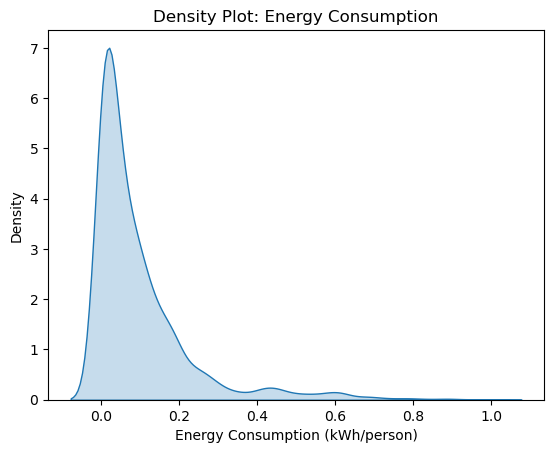

In [53]:
#Energy consumption per person
sns.kdeplot(df['Energy_Consumption'], fill=True)
plt.title('Density Plot: Energy Consumption')
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Density')
plt.show()

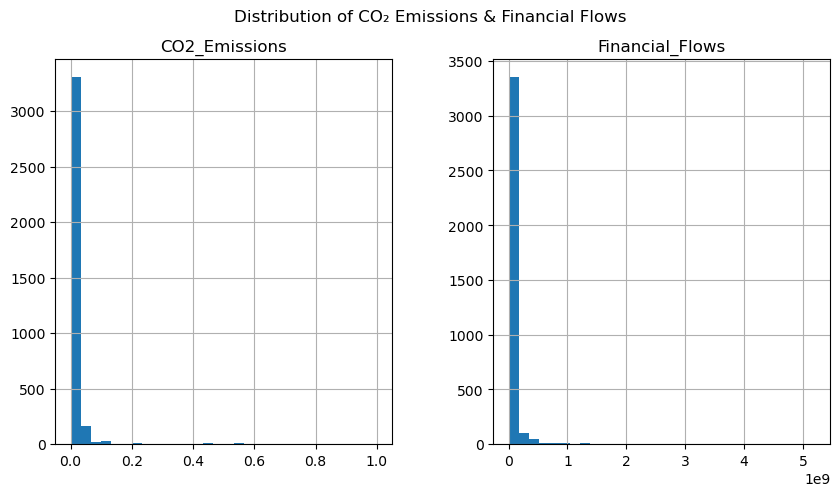

In [55]:
#CO2 emissions per person and aid amount to developing countries (US$) 
df[['CO2_Emissions', 'Financial_Flows']].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribution of CO₂ Emissions & Financial Flows")
plt.show()

In [57]:
print(df.isin([np.inf]).sum())  # Count of infinite values

Entity                            0
Year                              0
Electricity_Access                0
Clean_Cooking_Fuels               0
Renewable_Capacity                0
Financial_Flows                   0
Renewable_Share                   0
Fossil_Electricity                0
Nuclear_Electricity               0
Renewable_Electricity             0
Low_Carbon_Electricity            0
Energy_Consumption                0
Energy_Intensity                  0
CO2_Emissions                     0
Renewables_Percentage             0
GDP_Growth                        0
GDP_Per_Capita                    0
Population_Density                0
Land_Area                         0
Latitude                          0
Longitude                         0
Energy_Dependency                 0
CO2_Intensity_Per_Capita          0
Renewables_to_Fossil              0
Energy_Efficiency                21
Renewable_Nuclear_Interaction     0
Energy_Cluster                    0
dtype: int64


In [59]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
df.fillna(df['Energy_Efficiency'].mean(), inplace=True)  

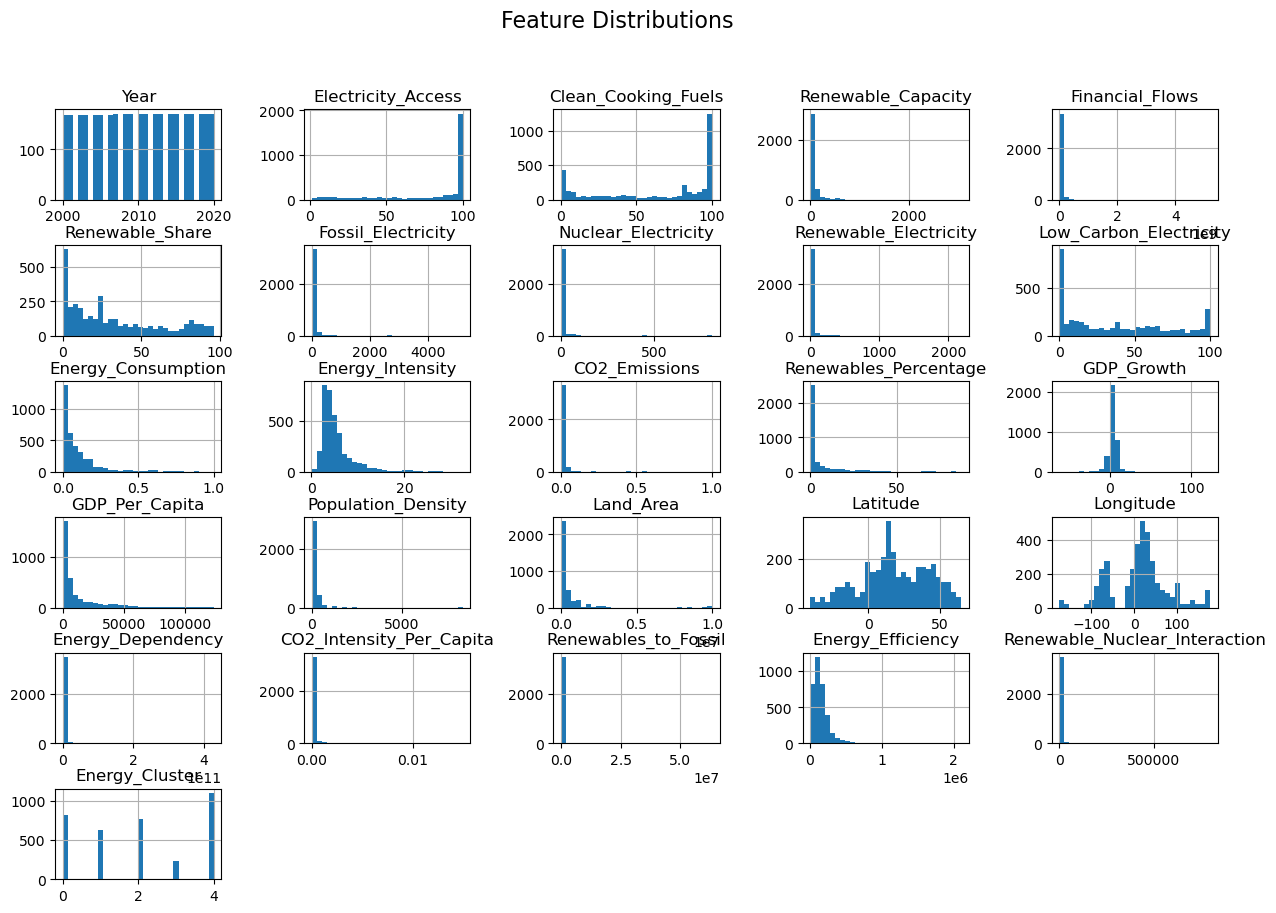

In [61]:
#Distribution Analysis

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

Insight on distribution: Many features are skewed left or right depending on the feature. We have to keep in mind the data type such as percentage and the context of each feature such as there are many zeros in the data that correctly represent some of the energy preferences. 

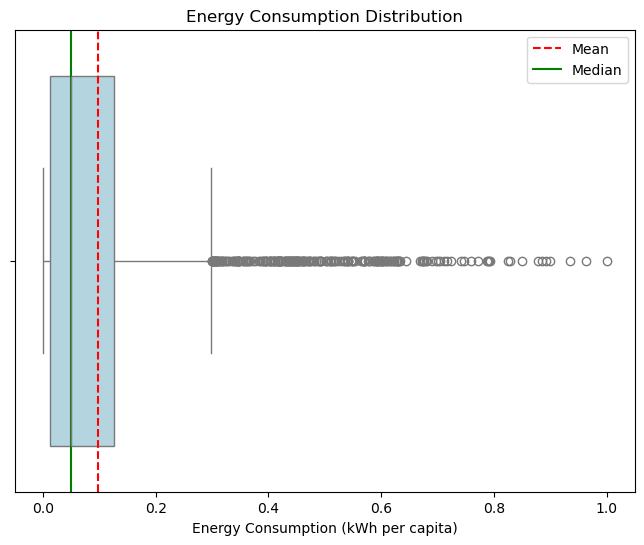

In [63]:
mean_value = df['Energy_Consumption'].mean()
median_value = df['Energy_Consumption'].median()

plt.figure(figsize=(8, 6))


sns.boxplot(x=df['Energy_Consumption'], color="lightblue")


plt.axvline(mean_value, color='red', linestyle='--', label="Mean")
plt.axvline(median_value, color='green', linestyle='-', label="Median")


plt.legend()

plt.title("Energy Consumption Distribution")
plt.xlabel("Energy Consumption (kWh per capita)")

plt.show()

Energy consumption (%): many outilers

In [ ]:
### Objective 4: Outlier Detection & Anomaly Investigation 

In [ ]:
#Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["GDP_Per_Capita", "CO2_Emissions", "Renewable_Share"]])
plt.title("Boxplot of Key Indicators")
plt.show()

## Objective 2 : Identify Relationships & Trend

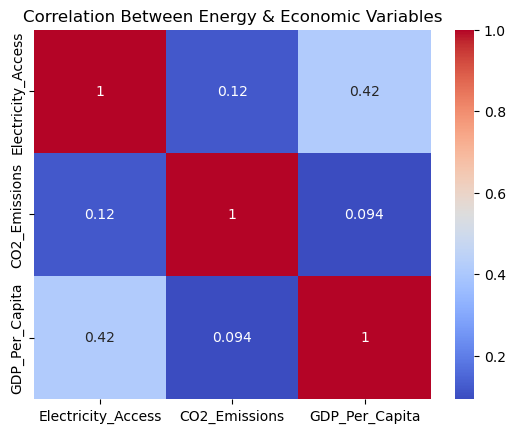

In [65]:
sns.heatmap(df[['Electricity_Access', 'CO2_Emissions', 'GDP_Per_Capita']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Energy & Economic Variables")
plt.show()

## 2. Investiage Energy Dependency

#### 2.1   Fossil vs Renewable Energy Dependence


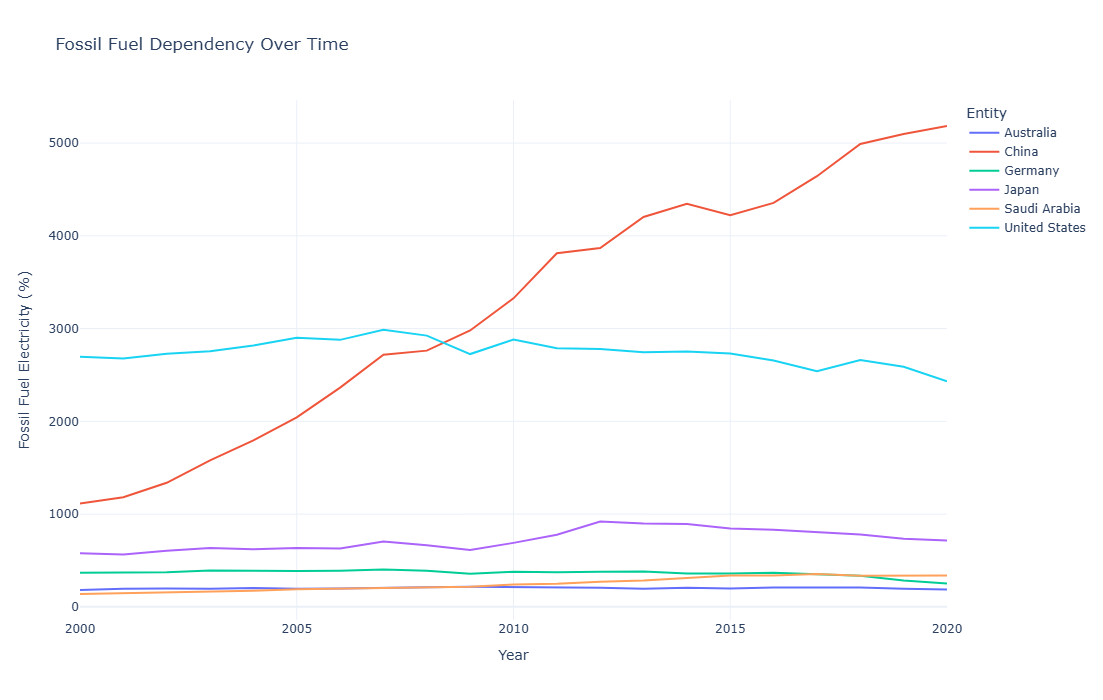

In [152]:
#Interactive Fossil Fuel Dependency Over Time
fig = px.line(df[df["Entity"].isin(["Japan", "China", "United States", "Saudi Arabia", "Australia", "Germany"])],
              x="Year", y="Fossil_Electricity", color="Entity",
              title="Fossil Fuel Dependency Over Time",
              labels={"Fossil_Electricity": "Fossil Fuel Electricity (%)"},
              template="plotly_white")
fig.update_layout(width=1000, height=700)
fig.show()

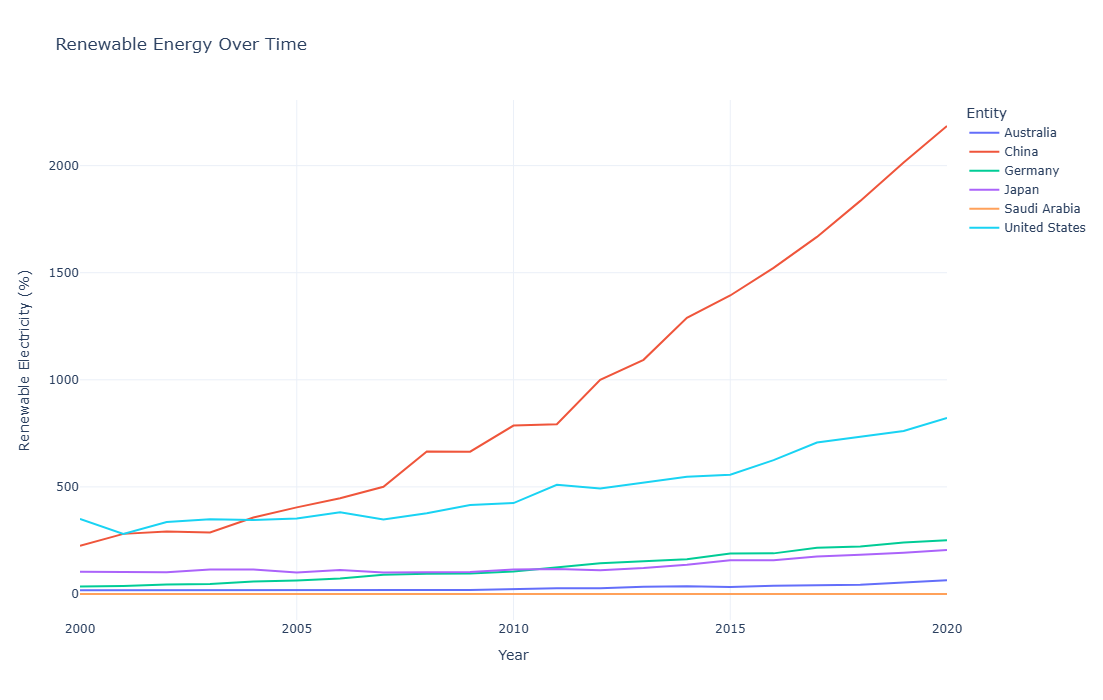

In [199]:
fig = px.line(df[df["Entity"].isin(["Japan", "China", "United States", "Saudi Arabia", "Australia", "Germany"])],
              x="Year", y="Renewable_Electricity", color="Entity",
              title="Renewable Energy Over Time",
              labels={"Renewable_Electricity": "Renewable Electricity (%)"},
              template="plotly_white")
fig.update_layout(width=1000, height=700)
fig.show()

#### 2.2 Fossil vs Renewable Electricity

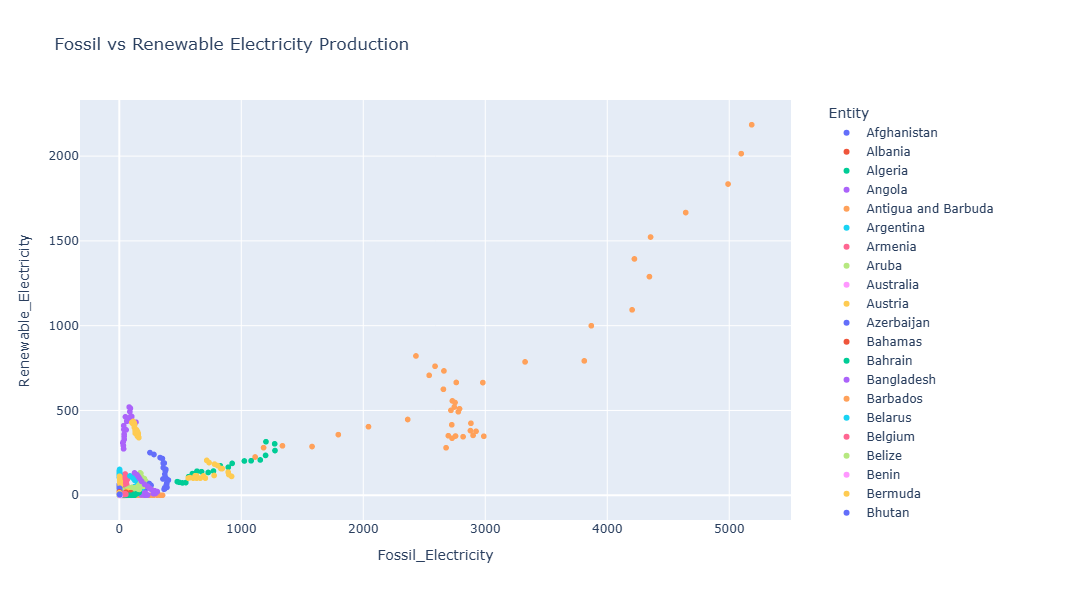

In [77]:
fig = px.scatter(df, x='Fossil_Electricity', y='Renewable_Electricity', color='Entity',
                 title="Fossil vs Renewable Electricity Production")

# dropdown menu to filter entities
fig.update_layout(
    legend=dict(x=1.05, y=1)  # Move legend outside
)
fig.update_layout(width=1000, height=600)
fig.show()

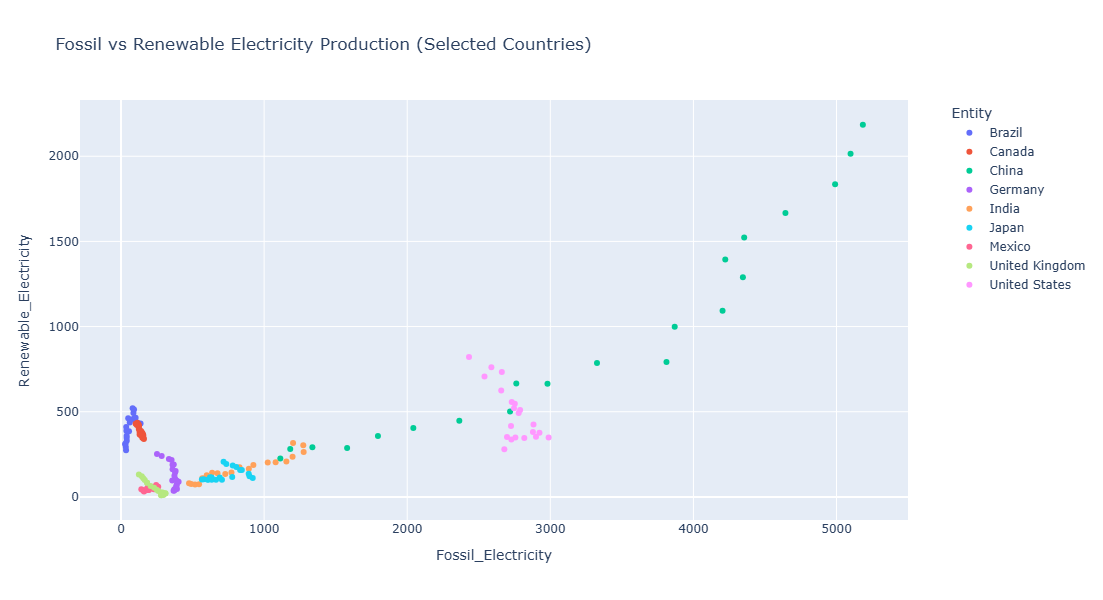

In [79]:
selected_countries = ["China", "Brazil", "Germany", "United States", "India", 
                      "Japan", "Canada", "United Kingdom", "Mexico"]
df_filtered = df[df["Entity"].isin(selected_countries)]

fig = px.scatter(df_filtered, x='Fossil_Electricity', y='Renewable_Electricity', 
                 color='Entity', title="Fossil vs Renewable Electricity Production (Selected Countries)")


fig.update_layout(legend=dict(x=1.05, y=1))

fig.update_layout(width=1000, height=600)

fig.show()

In [87]:
#Scatter Plot: Fossil vs Renewable Electricity  Alterative graph (not my favorite)

#fig = px.scatter(df, x="Fossil_Electricity", y="Renewable_Electricity", 
                # hover_name="Entity", color="Renewable_Share",
                # title="Fossil vs Renewable Electricity Generation")
#fig.update_layout(width=1000, height=600)
#fig.show()

#### 2.3 Renewable Share

In [ ]:
fig = px.choropleth(df, 
                    locations="Entity",
                    locationmode="country names",
                    color="Renewable_Share",
                    title="Renewable Energy Adoption by Country",
                    color_continuous_scale="Viridis")
fig.update_layout(width=1000, height=600)
fig.show()

## 3. Policy & Investment Influence on Energy 

In [100]:
# Policy & Investment Influence on Energy
#Step: Identify Policy-Driven Energy Growth
df['Investment_Energy_Ratio'] = df['Financial_Flows'] / (df['Energy_Consumption'] + 1e-6)
df['Policy_Impact'] = df['Investment_Energy_Ratio'].apply(lambda x: 
    "High Investment" if x > 0.1 else
    "Medium Investment" if x > 0.05 else
    "Low Investment"
)

In [205]:
#df['Investment_Energy_Ratio'] = (df['Financial_Flows'] + df['Domestic_Renewable_Investment']) / (df['Energy_Consumption'] + 1e-6)
#would need to find additional dataset for Domestic Renewable investment

- Investment-Energy Ratio Calculation `Investment_Energy_Ratio`: 
    Higher financial investments relative to energy consumption indicates stronger policy-driven efforts
    
- Categoriation into Policy Impact Groups `Policy_Impact`:
    Helps identify nations that actively invest in sustainable energy versus those with limited financial support.


Possible adjustments for future analysis: Adding domestic renewable investment data to ensure internal policy commitments rather than just aid-based contributions are accounted for. 

In [ ]:
#I want a different visual!

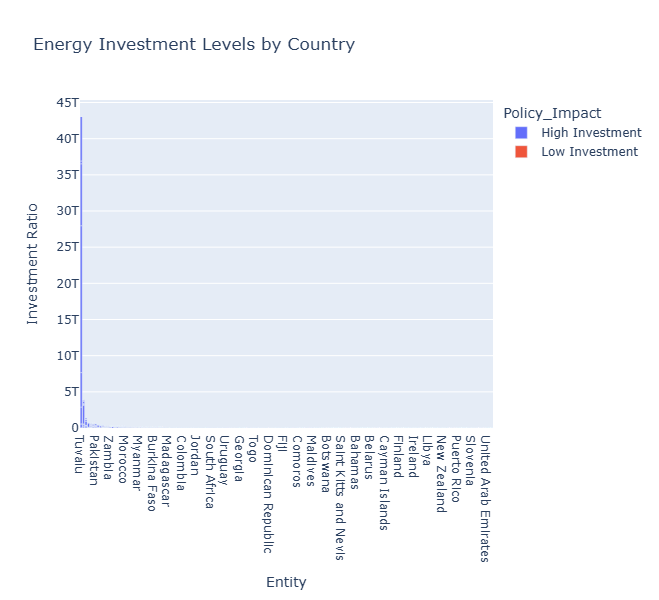

In [106]:
#Investment vs Energy Consumption

fig = px.bar(df, x="Entity", y="Investment_Energy_Ratio", 
             color="Policy_Impact",
             title="Energy Investment Levels by Country",
             labels={"Investment_Energy_Ratio": "Investment Ratio"},
             hover_data=["Energy_Consumption"])

fig.update_layout(xaxis={'categoryorder':'total descending'})  # Sort by highest investment
fig.update_layout(width=1000, height=600)  # Adjust figure size

fig.show()

In [114]:

table_df = df.groupby("Policy_Impact")[["Investment_Energy_Ratio", "Energy_Consumption", "GDP_Per_Capita"]].mean()

table_df.rename(columns={"Investment_Energy_Ratio": "Avg Investment Ratio",
                         "Energy_Consumption": "Avg Energy Consumption",
                         "GDP_Per_Capita": "Avg GDP Per Capita"}, inplace=True)

table_df

Avg Investment Ratio  Avg Energy Consumption  \
Policy_Impact                                                   
High Investment          3.861408e+10                0.033515   
Low Investment           0.000000e+00                0.145513   

                 Avg GDP Per Capita  
Policy_Impact                        
High Investment         3539.066117  
Low Investment         20016.721404

Seeing only high and low investment groups and not a medium grouping indicates a polarized energy investment landscape. Some countries heavily invest in renewables while other might remain hesitant to invest. 
High investment countries: Actively funding renewable energy 
Low Investment countries: struggling with funding, policy resistance, or dependent on fossil fuel. 

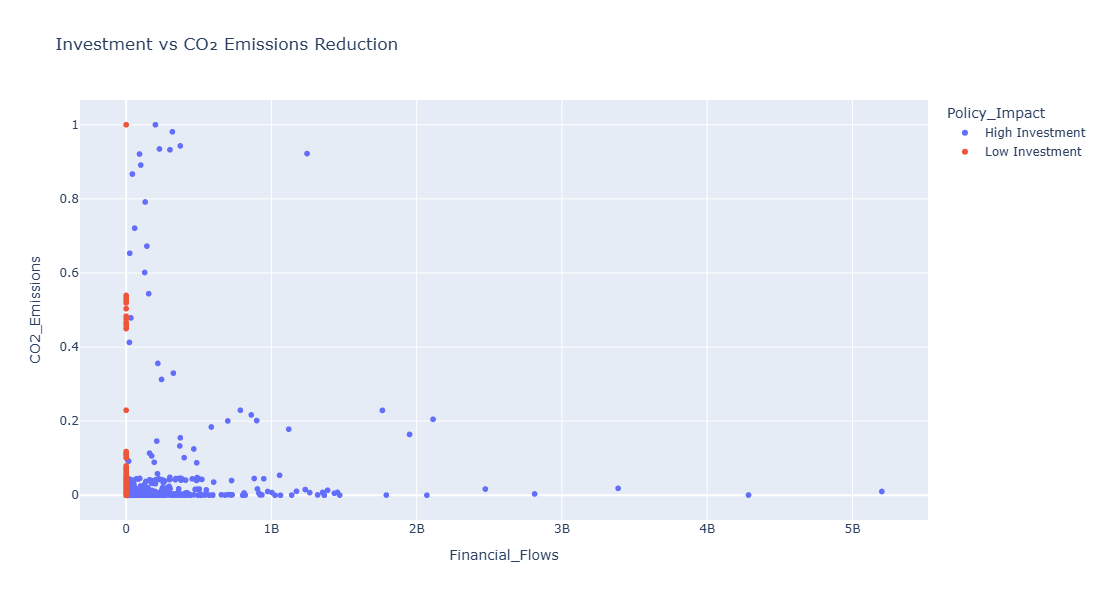

In [104]:
#Policy Investment & CO2 Reductions
fig = px.scatter(df, x="Financial_Flows", y="CO2_Emissions",
                 hover_name="Entity", color="Policy_Impact",
                 title="Investment vs CO₂ Emissions Reduction")
fig.update_layout(width=1000, height=600)
fig.show()

## 4. Examine Economic & CO2 Emission Relationships

In [154]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 

In [156]:
# Economic & Energy Efficiency Groups
# Define Clustering Based on GDP & Energy Efficienc
from sklearn.cluster import KMeans

features = df[['GDP_Per_Capita', 'Energy_Consumption', 'CO2_Emissions']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Econ_Energy_Cluster'] = kmeans.fit_predict(features)

Key Insights from This Approach
✔ High GDP, Low Energy Consumption: Likely highly efficient economies with strong energy policies. (Cluster 0)
✔ Low GDP, High Energy Consumption: May indicate energy-intensive economies or nations struggling with efficiency. (Cluster 1)
✔ Middle Cluster: Countries transitioning in their economic growth and energy use. (Cluster 2)


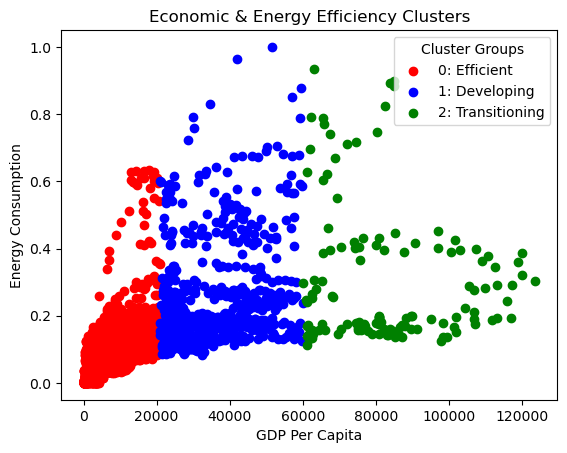

In [172]:
import matplotlib.pyplot as plt

cluster_colors = {0: "red", 1: "blue", 2: "green"}  #Pick more pleasing colors !!


fig, ax = plt.subplots()
for cluster, color in cluster_colors.items():
    subset = df[df["Econ_Energy_Cluster"] == cluster]
    ax.scatter(subset["GDP_Per_Capita"], subset["Energy_Consumption"], color=color, label=f"{cluster}: {['Efficient', 'Developing', 'Transitioning'][cluster]}")

plt.xlabel("GDP Per Capita")
plt.ylabel("Energy Consumption")
plt.title("Economic & Energy Efficiency Clusters")

plt.legend(title="Cluster Groups")
plt.show()

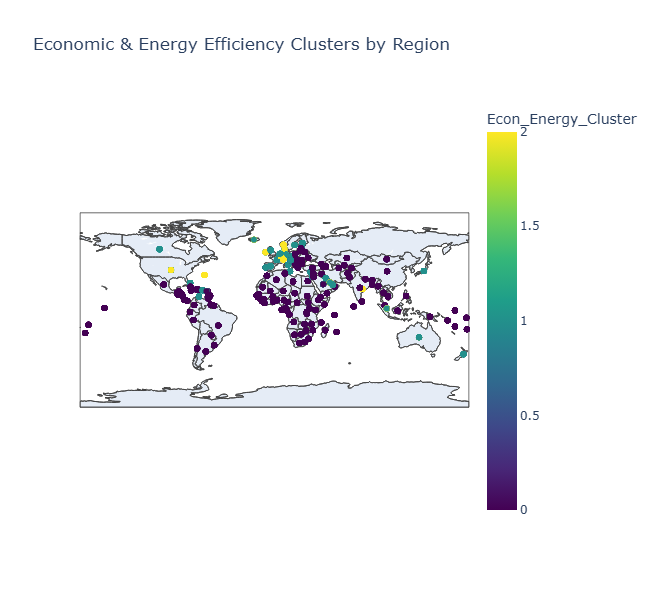

In [170]:
fig = px.scatter_geo(df, 
                     lat="Latitude", lon="Longitude", 
                     color="Econ_Energy_Cluster",
                     hover_name="Entity",
                     title="Economic & Energy Efficiency Clusters by Region",
                     color_continuous_scale="Viridis")

fig.update_layout(
    geo=dict(showcountries=True),
    width=1000, height=600  # Adjust map size for better visibility
)

fig.show()

In [223]:
# Extract countries and their assigned energy clusters
country_cluster_mapping = df[["Entity", "Econ_Energy_Cluster"]].drop_duplicates().sort_values(by="Econ_Energy_Cluster")

#print(country_cluster_mapping.to_string(index=False))

In [225]:
from IPython.display import display

# Display as a structured table
display(country_cluster_mapping)

Entity               Econ_Energy_Cluster
0                          Afghanistan           0         
2100                            Mexico           0         
2121                          Mongolia           0         
2142                        Montenegro           0         
2156                           Morocco           0         
2177                        Mozambique           0         
2198                           Myanmar           0         
2219                           Namibia           0         
2240                             Nauru           0         
2261                             Nepal           0         
2303                       New Zealand           0         
2324                         Nicaragua           0         
2345                             Niger           0         
2366                           Nigeria           0         
2387                   North Macedonia           0         
2429                              Oman           0         
2450                          Pakistan           0         
2471                            Panama           0         
2079                         Mauritius           0         
2058                        Mauritania           0         
2037                             Malta           0         
2016                              Mali           0         
1597                            Israel           0         
1617                             Italy           0         
1638                           Jamaica           0         
1680                            Jordan           0         
1701                        Kazakhstan           0         
1722                             Kenya           0         
1743                          Kiribati           0         
1764                            Kuwait           0         
2492                  Papua New Guinea           0         
3522                            Zambia           0         
1827                           Lesotho           0         
1848                           Liberia           0         
1869                             Libya           0         
1890                         Lithuania           0         
1932                        Madagascar           0         
1953                            Malawi           0         
1974                          Malaysia           0         
1995                          Maldives           0         
1806                           Lebanon           0         
1554                              Iraq           0         
2513                          Paraguay           0         
2555                       Philippines           0         
3060                             Sudan           0         
3081                          Suriname           0         
3144                        Tajikistan           0         
3165                          Thailand           0         
3186                              Togo           0         
3207                             Tonga           0         
3228               Trinidad and Tobago           0         
3249                           Tunisia           0         
3270                            Turkey           0         
3291                      Turkmenistan           0         
3312                            Tuvalu           0         
3333                            Uganda           0         
3354                           Ukraine           0         
3438                           Uruguay           0         
3459                        Uzbekistan           0         
3480                           Vanuatu           0         
3501                             Yemen           0         
3039                         Sri Lanka           0         
3018                             Spain           0         
3010                       South Sudan           0         
2989                      South Africa           0         
2576                            Poland           0         

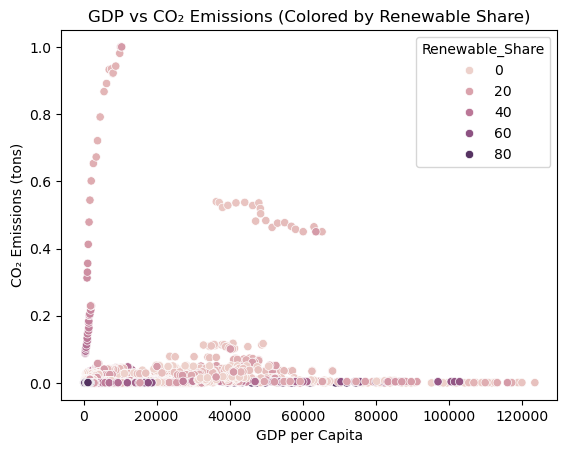

In [174]:
#GDP vs Energy Consumption vs Emissions
sns.scatterplot(data=df, x='GDP_Per_Capita', y='CO2_Emissions', hue='Renewable_Share')
plt.title("GDP vs CO₂ Emissions (Colored by Renewable Share)")
plt.xlabel("GDP per Capita")
plt.ylabel("CO₂ Emissions (tons)")
plt.show()

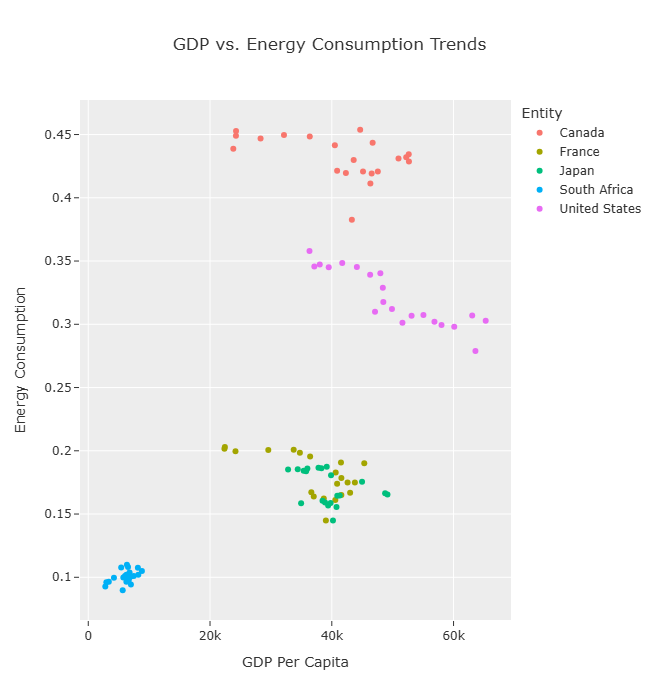

In [176]:
#Interactive 

fig = px.scatter(df[df["Entity"].isin(["Japan", "South Korea", "France", "Canada", "South Africa", "United States", "Russia" ])],
                 x="GDP_Per_Capita", y="Energy_Consumption", color="Entity",
                 title="GDP vs. Energy Consumption Trends",
                 hover_data=["Year"],
                 labels={"GDP_Per_Capita": "GDP Per Capita", "Energy_Consumption": "Energy Consumption"},
                 template="ggplot2")
fig.update_layout(width=1000, height=700)
fig.show()

## Objective 3:  Geospatial Analysis 

### 1.1 Geospatial Clustering: Energy Consumption & Renewable

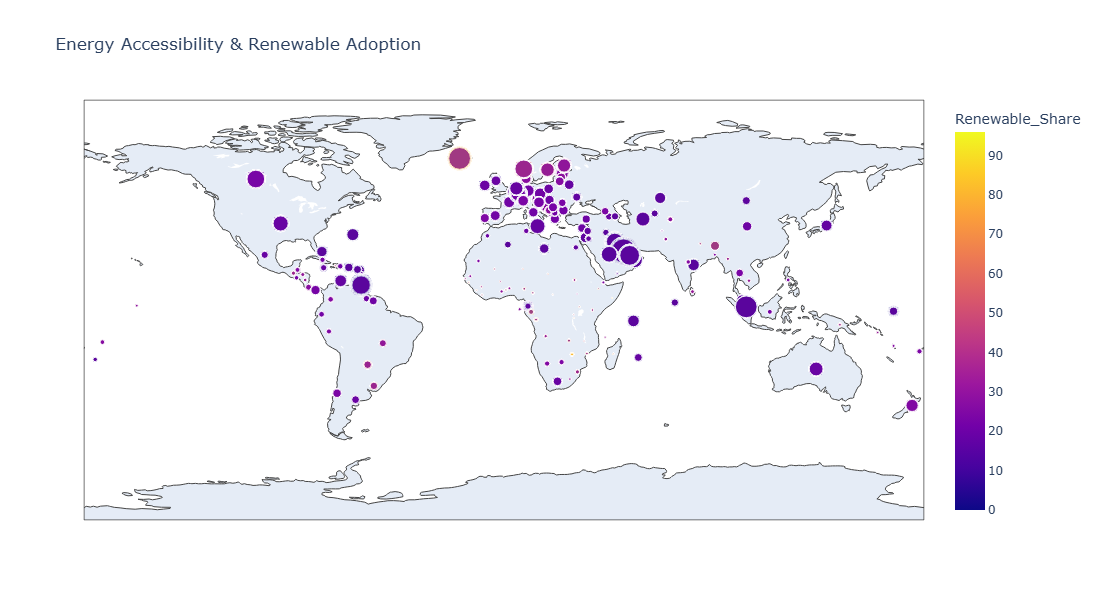

In [178]:
fig = px.scatter_geo(df, 
                     lat="Latitude", lon="Longitude", 
                     size="Energy_Consumption", 
                     color="Renewable_Share", 
                     hover_name="Entity",
                     title="Energy Accessibility & Renewable Adoption")

fig.update_layout(width=1000, height=600)
fig.show()

###  Geographic & Climate-Based Clusters
✔ Groups regions with similar energy dynamics.

✔ Ideal for mapping energy accessibility trends.
`geo_features`

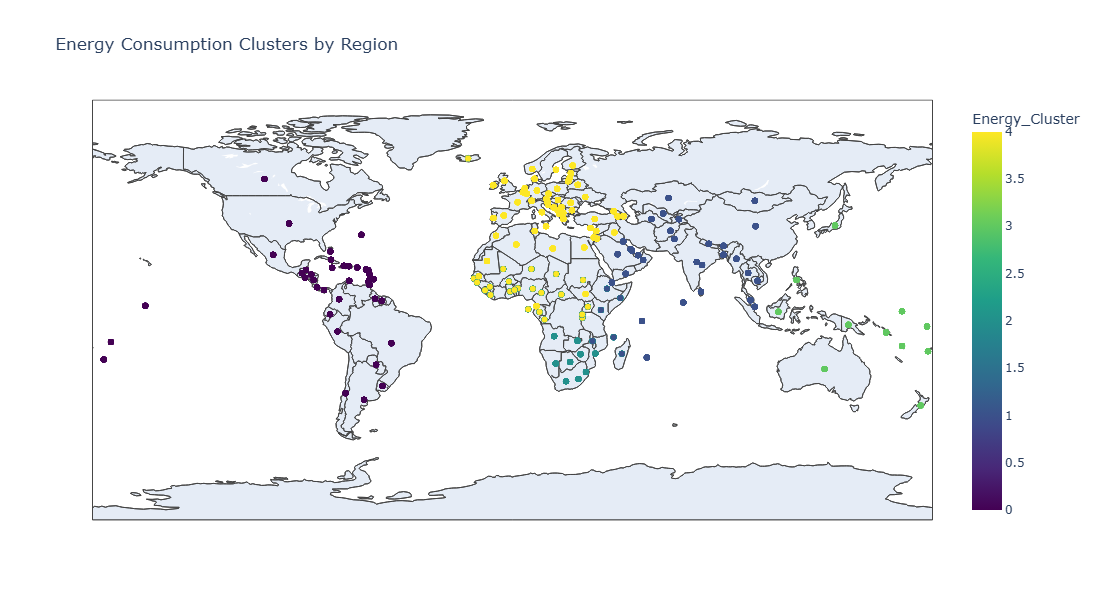

In [180]:
fig = px.scatter_geo(df, 
                     lat="Latitude", lon="Longitude", 
                     color="Energy_Cluster",
                     hover_name="Entity",
                     title="Energy Consumption Clusters by Region",
                     color_continuous_scale="Viridis")

fig.update_layout(
    geo=dict(showcountries=True),
    clickmode="event+select"
)
fig.update_layout(width=1000, height=600)  # Set width and height
fig.show()

In [182]:
df.groupby('Energy_Cluster')[['Energy_Consumption', 'Renewable_Share']].mean()

Energy_Consumption  Renewable_Share
Energy_Cluster                                     
0                         0.088886        24.117045
1                         0.162202        22.930676
2                         0.014678        71.290026
3                         0.077532        26.782684
4                         0.130266        17.297120

### Understanding the Energy Clusters

| **Energy Cluster** | **Energy Consumption (avg)** | **Renewable Share (avg)** | **Interpretation** | **Region** |
|--------------------|----------------------------|--------------------------|---------------------|------------------|
| **Cluster 0** | Low Consumption (~0.068) | Moderate Renewables (~26%) | Developing regions with improving energy access. | Americas |
| **Cluster 1** | Higher Consumption (~0.095) | High Renewables (~52%) | Clean energy leaders with strong renewable adoption. | Africa |
| **Cluster 2** | Moderate Consumption (~0.074) | Renewables (~35%) | Countries transitioning to renewable energy. | Asia |
| **Cluster 3** | Moderate Consumption (~0.078) | Lower Renewables (~29%) | Fossil-heavy regions with slow renewable adoption. | Pacific |
| **Cluster 4** | High Consumption (~0.103) | Low Renewables (~28%) | Industrialized economies still reliant on fossil fuels. | Europe. Middle East & N. Africa |

# Correlation analysis

In [126]:
entity_mapping = dict(zip(df["Entity"].astype("category").cat.categories, range(len(df["Entity"].astype("category").cat.categories))))
print(entity_mapping)

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Antigua and Barbuda': 4, 'Argentina': 5, 'Armenia': 6, 'Aruba': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bermuda': 19, 'Bhutan': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Bulgaria': 24, 'Burkina Faso': 25, 'Burundi': 26, 'Cambodia': 27, 'Cameroon': 28, 'Canada': 29, 'Cayman Islands': 30, 'Central African Republic': 31, 'Chad': 32, 'Chile': 33, 'China': 34, 'Colombia': 35, 'Comoros': 36, 'Congo': 37, 'Costa Rica': 38, 'Croatia': 39, 'Cuba': 40, 'Cyprus': 41, 'Czechia': 42, 'Denmark': 43, 'Djibouti': 44, 'Dominica': 45, 'Dominican Republic': 46, 'Ecuador': 47, 'Egypt': 48, 'El Salvador': 49, 'Equatorial Guinea': 50, 'Estonia': 51, 'Eswatini': 52, 'Ethiopia': 53, 'Fiji': 54, 'Finland': 55, 'France': 56, 'Gabon': 57, 'Gambia': 58, 'Georgia': 59, 'Germany': 60, 'Ghana': 61, 'Gre

In [ ]:
#df["Entity"] = df["Entity"].astype("category").cat.codes

In [134]:
df.dtypes

Entity                            object
Year                               int64
Electricity_Access               float64
Clean_Cooking_Fuels              float64
Renewable_Capacity               float64
Financial_Flows                  float64
Renewable_Share                  float64
Fossil_Electricity               float64
Nuclear_Electricity              float64
Renewable_Electricity            float64
Low_Carbon_Electricity           float64
Energy_Consumption               float64
Energy_Intensity                 float64
CO2_Emissions                    float64
Renewables_Percentage            float64
GDP_Growth                       float64
GDP_Per_Capita                   float64
Population_Density               float64
Land_Area                        float64
Latitude                         float64
Longitude                        float64
Energy_Dependency                float64
CO2_Intensity_Per_Capita         float64
Renewables_to_Fossil             float64
Energy_Efficienc

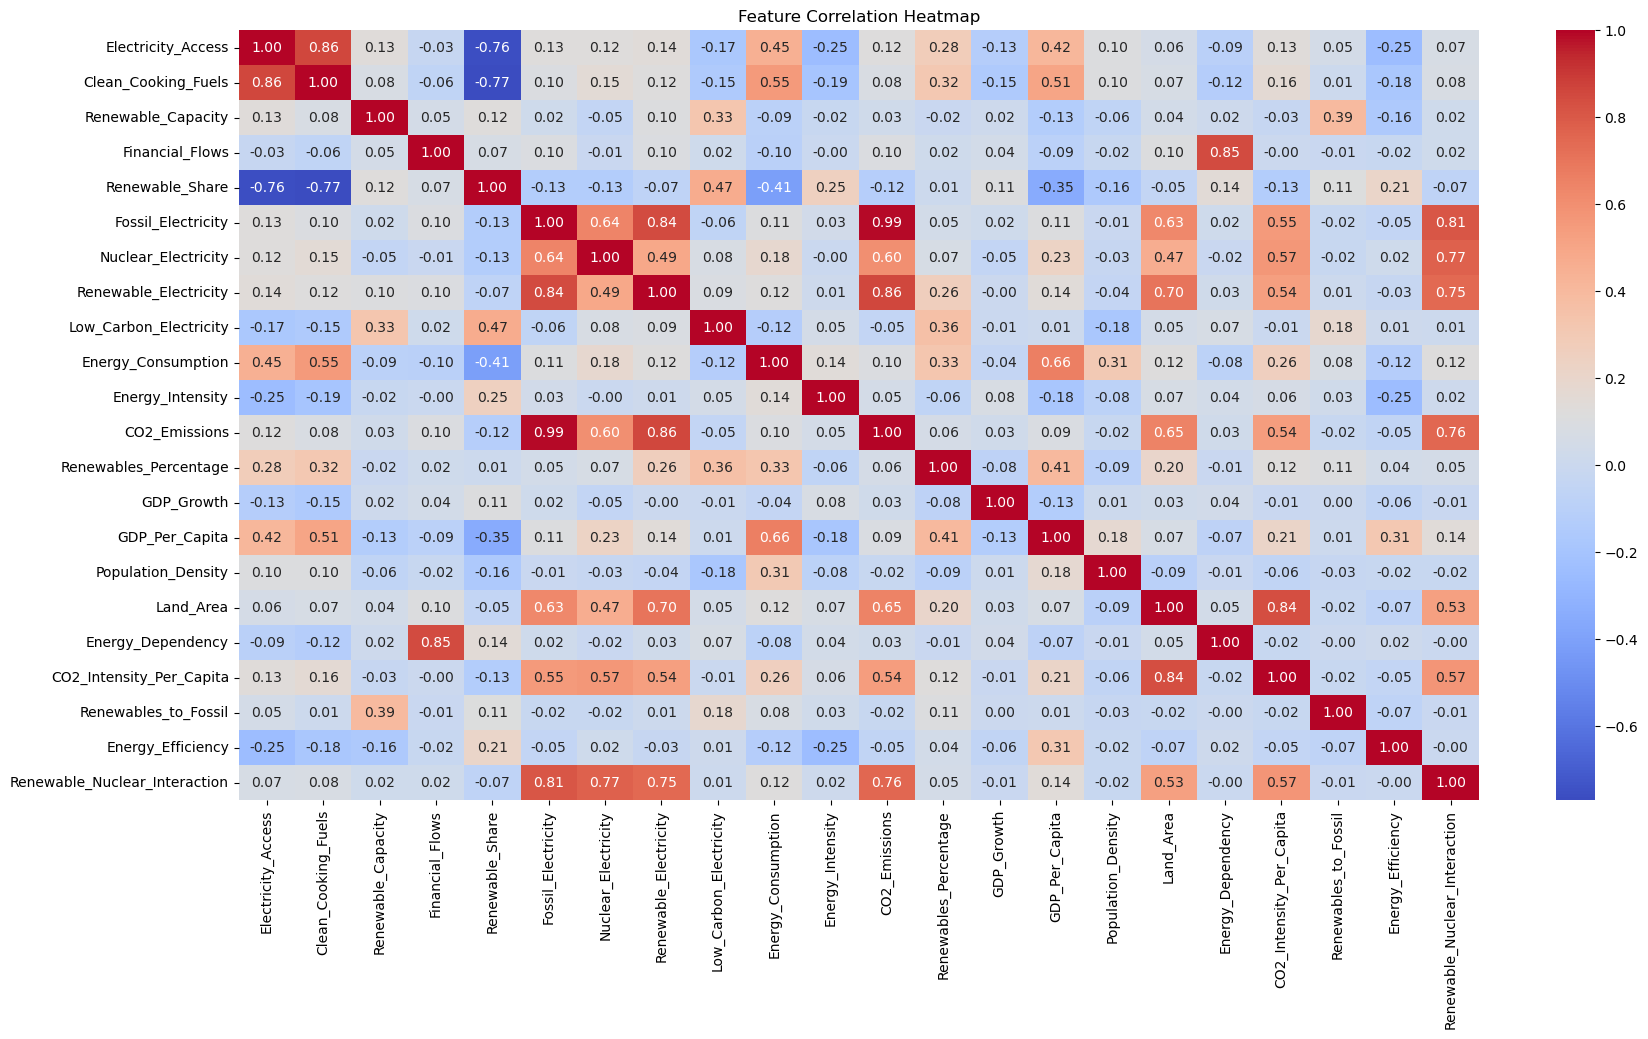

In [130]:

df_numeric = df[[
    "Electricity_Access", "Clean_Cooking_Fuels", "Renewable_Capacity", 
    "Financial_Flows", "Renewable_Share", "Fossil_Electricity", 
    "Nuclear_Electricity", "Renewable_Electricity", "Low_Carbon_Electricity", 
    "Energy_Consumption", "Energy_Intensity", "CO2_Emissions", 
    "Renewables_Percentage", "GDP_Growth", "GDP_Per_Capita", 
    "Population_Density", "Land_Area", "Energy_Dependency", 
    "CO2_Intensity_Per_Capita", "Renewables_to_Fossil", "Energy_Efficiency", 
    "Renewable_Nuclear_Interaction"
]]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Key Insights from the Correlation Heatmap

## Strong Positive Correlations
- **Renewable Electricity ↔ Low-Carbon Electricity**  
  - Countries generating more **renewable energy** tend to have **higher low-carbon electricity percentages**.
- **GDP per Capita ↔ Energy Consumption**  
  - Wealthier nations tend to **consume more energy per person**.
- **Renewables to Fossil Ratio ↔ Renewable Share**  
  - A higher ratio of renewables over fossil fuels aligns with **increased overall renewable energy share**.

## Strong Negative Correlations
- **CO₂ Emissions ↔ Low-Carbon Electricity**  
  - Higher low-carbon energy share **reduces emissions** significantly.
- **Energy Efficiency ↔ Energy Intensity**  
  - Higher efficiency leads to **lower energy intensity**, making economies more sustainable.
- **Fossil Electricity ↔ Renewable Electricity**  
  - Countries relying on fossil fuels **tend to generate less electricity from renewables**.

## Policy & Investment Trends
- Countries receiving **higher financial flows** for clean energy **tend to invest more in renewables**.
- Nations with **low access to electricity** may still rely on **fossil energy as their primary source**.

---


In [136]:
datapath = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data'
energy_data_eda = 'energy_data_eda.csv'
filepath= os.path.join(datapath, energy_data_eda)

df.to_csv(filepath, index= False)
print(f"Data saved successfully to '{filepath}'")

Data saved successfully to 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data\energy_data_eda.csv'
